In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# IMPORT PACKAGES
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
# Read the data file
data = pd.read_csv('/content/drive/MyDrive/heart_attack_prediction_dataset.csv')

In [4]:
data.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [5]:
import pandas as pd
import numpy as np

# Check for missing values
missing_data = data.isnull().sum()
print("Missing values in each column:\n", missing_data)





Missing values in each column:
 Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype:

In [6]:

# Print all column names to verify
print("Columns in the dataset:", data.columns)



Columns in the dataset: Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')


In [7]:
# Assuming 'Sex', 'Country', 'Continent', 'Hemisphere', and 'Diet' are the categorical columns and they exist in your dataset
categorical_columns = ['Sex', 'Country', 'Continent', 'Hemisphere', 'Diet']  # Adjust this list based on your actual column names

# Convert these columns using one-hot encoding, dropping the first category in each to avoid multicollinearity
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Check the transformation
print(data.head())


  Patient ID  Age  Cholesterol Blood Pressure  Heart Rate  Diabetes  \
0    BMW7812   67          208         158/88          72         0   
1    CZE1114   21          389         165/93          98         1   
2    BNI9906   21          324         174/99          72         1   
3    JLN3497   84          383        163/100          73         1   
4    GFO8847   66          318          91/88          93         1   

   Family History  Smoking  Obesity  Alcohol Consumption  ...  \
0               0        1        0                    0  ...   
1               1        1        1                    1  ...   
2               0        0        0                    0  ...   
3               1        1        0                    1  ...   
4               1        1        1                    0  ...   

   Country_United States  Country_Vietnam  Continent_Asia  \
0                  False            False           False   
1                  False            False           False   

In [8]:


# Split 'Blood Pressure' into 'Systolic_BP' and 'Diastolic_BP'
data[['Systolic_BP', 'Diastolic_BP']] = data['Blood Pressure'].str.split('/', expand=True).astype(float)
data.drop(columns='Blood Pressure', inplace=True)  # Optionally drop the original column

# List of numeric columns to check for outliers
numeric_columns = ['Age', 'Cholesterol', 'Heart Rate', 'Systolic_BP', 'Diastolic_BP', 'BMI', 'Triglycerides']

for column in numeric_columns:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define the bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Print the shape of the data to see how many outliers have been removed
print("Data shape after outlier removal:", data.shape)

# Optionally, view the first few rows to verify
print(data.head())


Data shape after outlier removal: (8763, 50)
  Patient ID  Age  Cholesterol  Heart Rate  Diabetes  Family History  Smoking  \
0    BMW7812   67          208          72         0               0        1   
1    CZE1114   21          389          98         1               1        1   
2    BNI9906   21          324          72         1               0        0   
3    JLN3497   84          383          73         1               1        1   
4    GFO8847   66          318          93         1               1        1   

   Obesity  Alcohol Consumption  Exercise Hours Per Week  ...  Continent_Asia  \
0        0                    0                 4.168189  ...           False   
1        1                    1                 1.813242  ...           False   
2        0                    0                 2.078353  ...           False   
3        0                    1                 9.828130  ...           False   
4        1                    0                 5.804299  ...  

In [9]:
!pip install imbalanced-learn


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


# Remove non-predictive columns
if 'Patient ID' in data.columns:
    data.drop('Patient ID', axis=1, inplace=True)


# Split the dataset into features and target variable
X = data.drop('Heart Attack Risk', axis=1)  # features
y = data['Heart Attack Risk']  # target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE only on training data to avoid information leakage into the test set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the balance after SMOTE
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", pd.Series(y_train_smote).value_counts())




Before SMOTE: Heart Attack Risk
0    4499
1    2511
Name: count, dtype: int64
After SMOTE: Heart Attack Risk
0    4499
1    4499
Name: count, dtype: int64


In [13]:
pip install seaborn


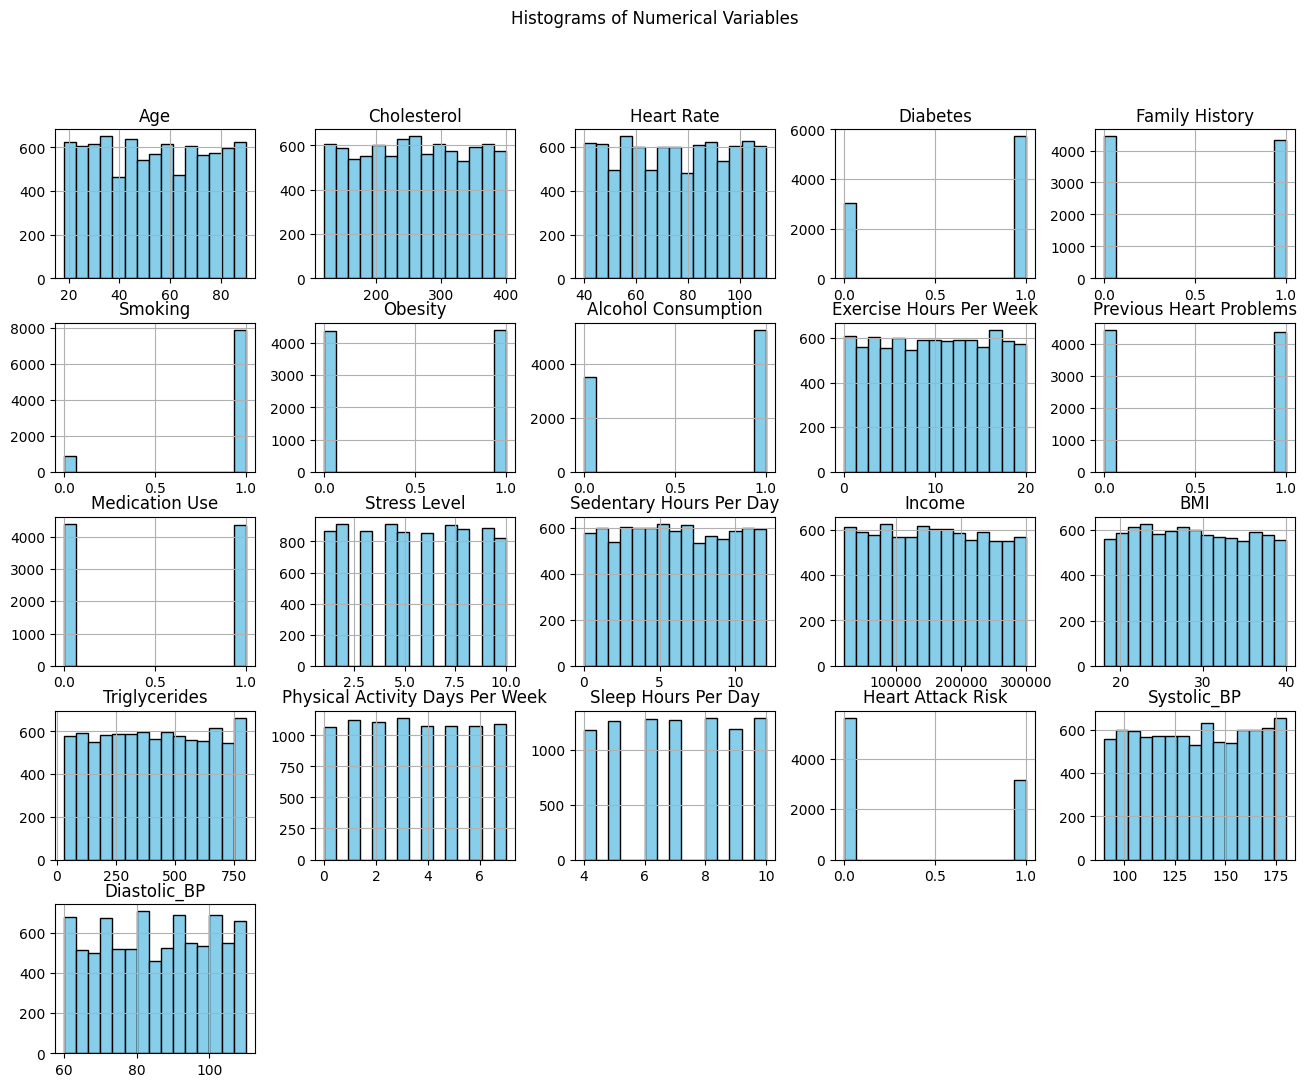

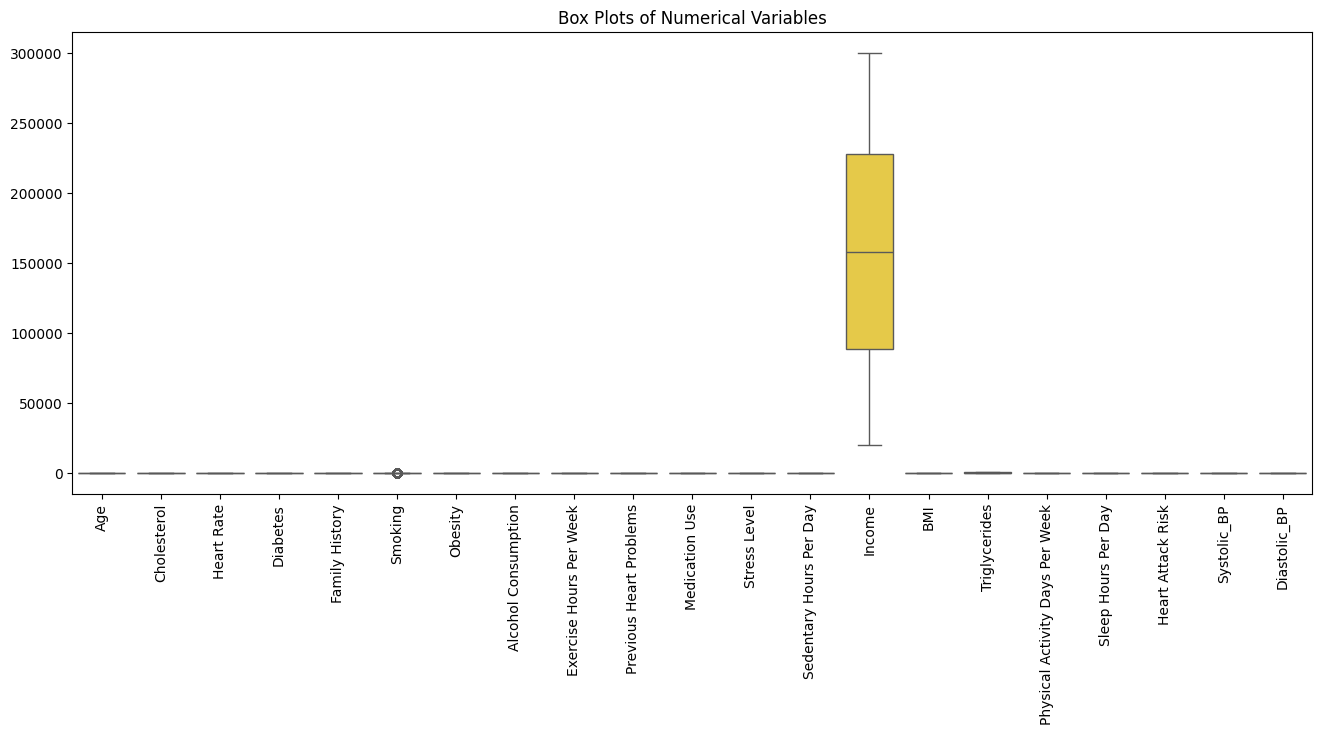

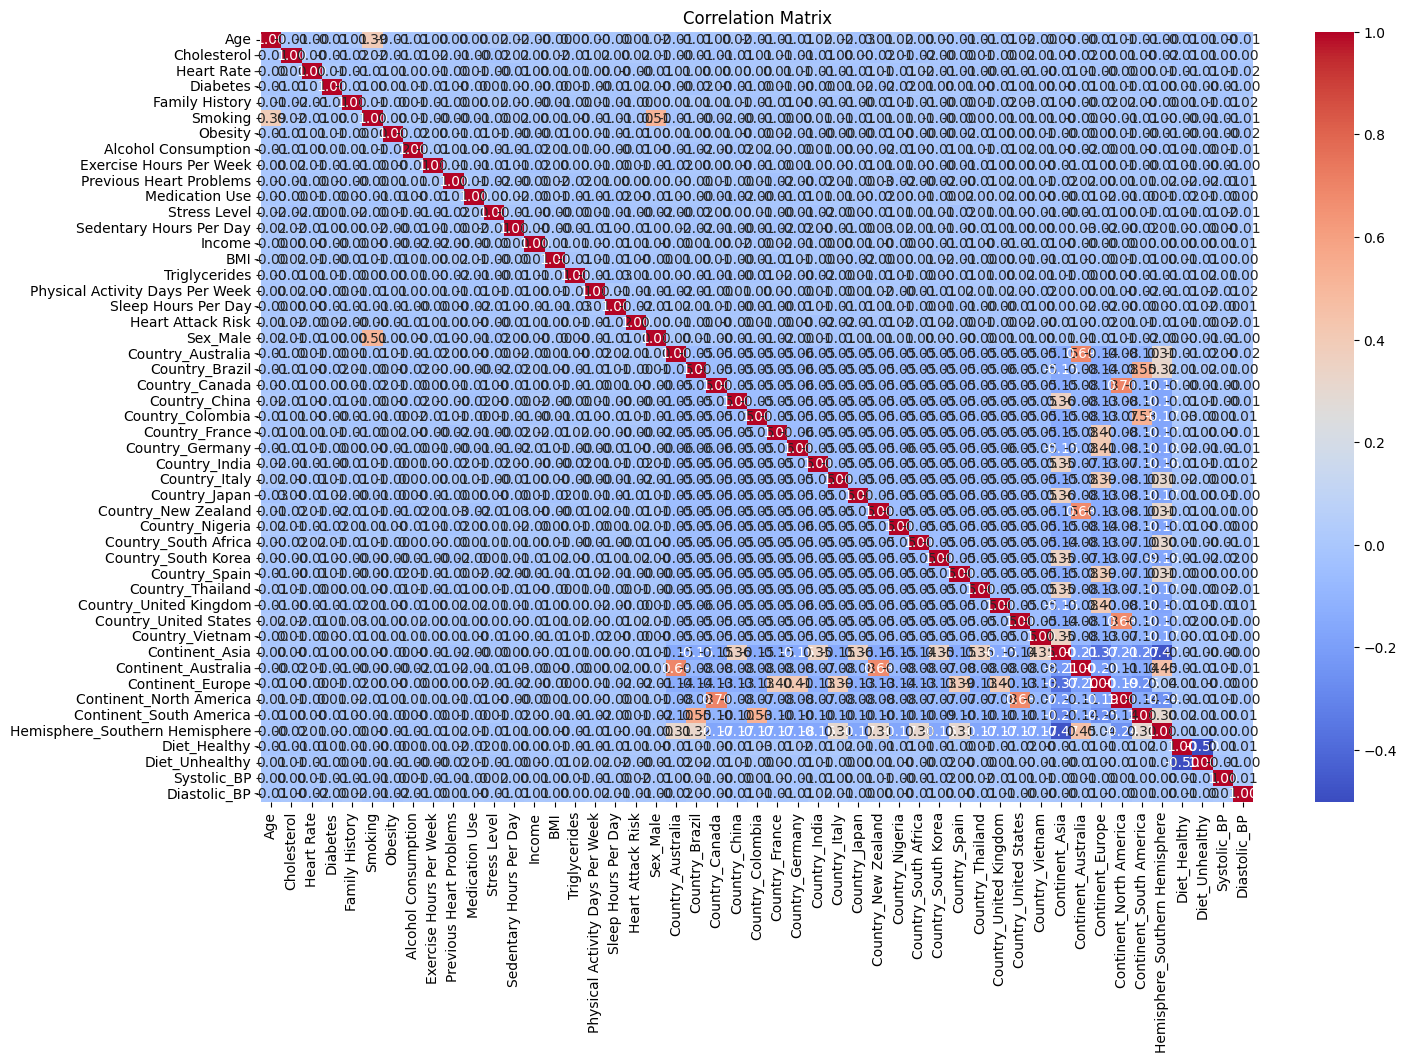

<ipython-input-15-dca0a64ac936>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=data, ax=ax, palette='viridis')
<ipython-input-15-dca0a64ac936>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=data, ax=ax, palette='viridis')
<ipython-input-15-dca0a64ac936>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=data, ax=ax, palette='viridis')
<ipython-input-15-dca0a64ac936>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the

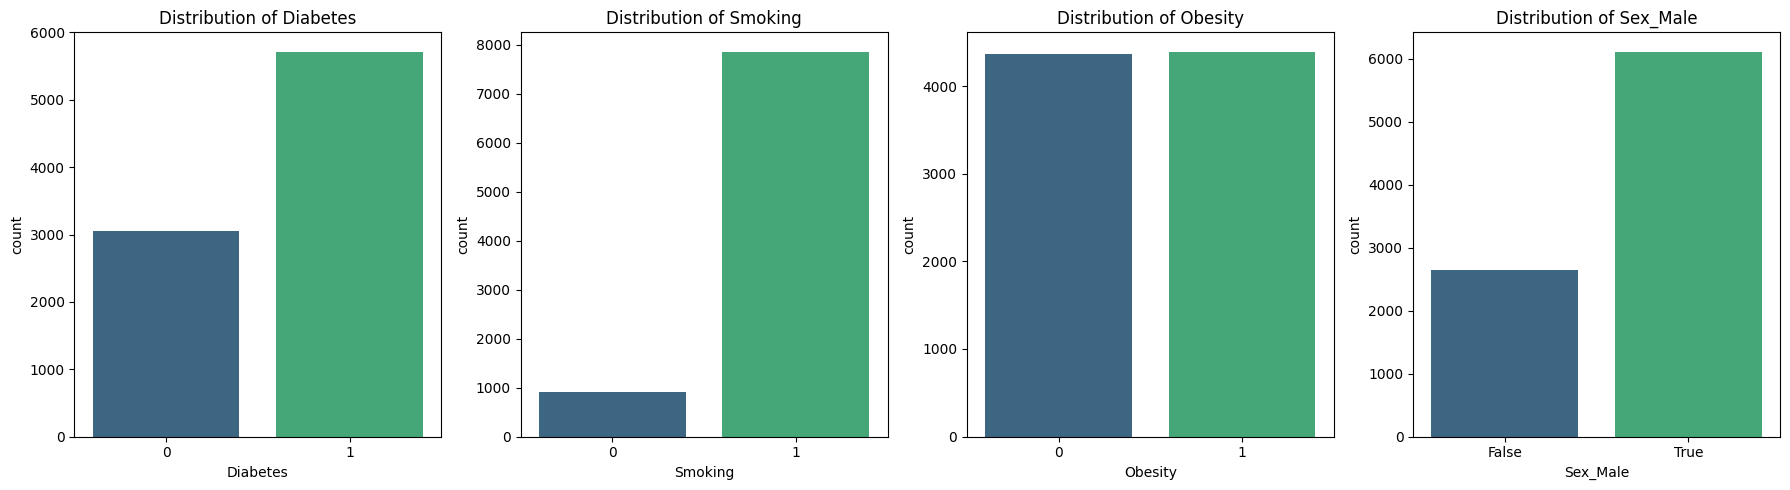

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,...,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,Systolic_BP,Diastolic_BP
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,0.495835,...,5.469702,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211,135.075659,85.156111
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.500011,...,2.859622,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502,26.349976,14.676565
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,...,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000,90.000000,60.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,...,3.000000,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000,112.000000,72.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,0.000000,...,5.000000,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000,135.000000,85.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,...,8.000000,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000,158.000000,98.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,...,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000,180.000000,110.000000


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive Statistics
summary_statistics = data.describe()

# Visualization 1: Histograms for all numerical variables
data.hist(figsize=(16, 12), bins=15, color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Numerical Variables')
plt.show()

# Visualization 2: Box plots for key numerical variables
plt.figure(figsize=(16, 6))
sns.boxplot(data=data.select_dtypes(include=['float64', 'int64']), palette="Set2")
plt.xticks(rotation=90)
plt.title('Box Plots of Numerical Variables')
plt.show()

correlation_matrix = data.corr()

# Visualization 3: Correlation Heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Since categorical variables like Country and Continent may have too many categories, we skip direct bar charts for them.
# However, we can visualize the distribution of 'Diabetes', 'Smoking', 'Obesity' as examples of categorical distributions.
categorical_features = ['Diabetes', 'Smoking', 'Obesity', 'Sex_Male']
fig, axes = plt.subplots(1, len(categorical_features), figsize=(18, 5))
for ax, feature in zip(axes, categorical_features):
    sns.countplot(x=feature, data=data, ax=ax, palette='viridis')
    ax.set_title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Return summary statistics
summary_statistics


In [16]:
# Descriptive Statistics
data.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,...,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,Systolic_BP,Diastolic_BP
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,0.495835,...,5.469702,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211,135.075659,85.156111
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.500011,...,2.859622,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502,26.349976,14.676565
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,...,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000,90.000000,60.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,...,3.000000,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000,112.000000,72.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,0.000000,...,5.000000,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000,135.000000,85.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,...,8.000000,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000,158.000000,98.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,...,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000,180.000000,110.000000


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Splitting the data into train and test sets
# Check if 'Patient ID' column exists in the DataFrame
if 'Patient ID' in data.columns:
    X = data.drop(['Heart Attack Risk', 'Patient ID'], axis=1)
else:
    X = data.drop(['Heart Attack Risk'], axis=1)
    y = data['Heart Attack Risk']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a LogisticRegression model with standard hyperparameters
log_reg = LogisticRegression(C=1.0, penalty='l2', solver='lbfgs', max_iter=1000)

# Fit the model
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

# Evaluating the model
accuracy_logistic = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy_logistic)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.6432103461392165
Confusion Matrix:
 [[1691    0]
 [ 938    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.64      1.00      0.78      1691
           1       0.00      0.00      0.00       938

    accuracy                           0.64      2629
   macro avg       0.32      0.50      0.39      2629
weighted avg       0.41      0.64      0.50      2629



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Splitting the data into train and test sets
X = data.drop(['Heart Attack Risk'], axis=1)  # Assuming 'Patient ID' is not needed for prediction
y = data['Heart Attack Risk']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Random Forest Classifier with standard hyperparameters
rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2,
                                  min_samples_leaf=1, max_features='auto', bootstrap=True, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluating the model
accuracy_randomforest = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy_randomforest)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy: 0.6394066184861164
Confusion Matrix:
 [[1666   25]
 [ 923   15]]
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.99      0.78      1691
           1       0.38      0.02      0.03       938

    accuracy                           0.64      2629
   macro avg       0.51      0.50      0.40      2629
weighted avg       0.55      0.64      0.51      2629



In [37]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Assuming the data is loaded and prepared correctly
X = data.drop(['Heart Attack Risk'], axis=1)  # Drop non-features and target variable
y = data['Heart Attack Risk']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an SVM classifier with standard parameters
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')  # 'scale' uses 1 / (n_features * X.var()) as value of gamma

# Fit the model
svm_model.fit(X_train, y_train)

# Predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy_svm)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.6432103461392165
Confusion Matrix:
 [[1691    0]
 [ 938    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.64      1.00      0.78      1691
           1       0.00      0.00      0.00       938

    accuracy                           0.64      2629
   macro avg       0.32      0.50      0.39      2629
weighted avg       0.41      0.64      0.50      2629



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


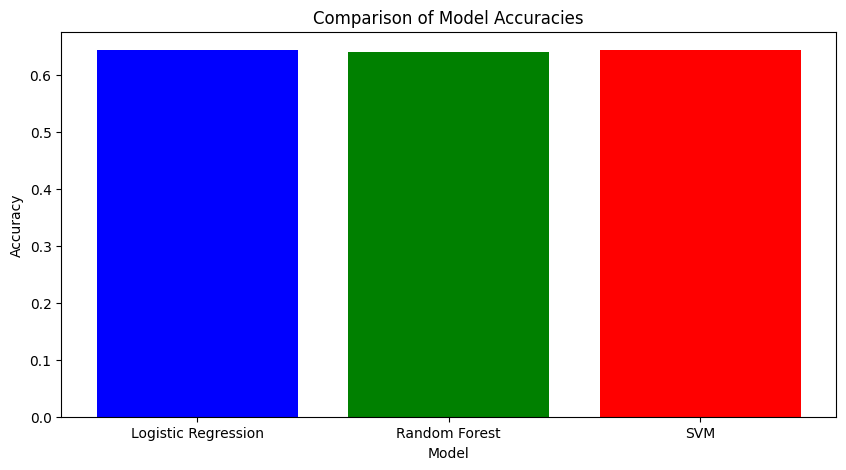

In [40]:
import matplotlib.pyplot as plt


accuracies = {
    "Logistic Regression": accuracy_logistic,
    "Random Forest": accuracy_randomforest,
    "SVM": accuracy_svm
}

# Plotting the accuracies
plt.figure(figsize=(10, 5))
models = list(accuracies.keys())
accuracy_scores = list(accuracies.values())
plt.bar(models, accuracy_scores, color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')

plt.show()

